In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv("data.csv")

# Asking Basic Questions

In [54]:
df.sample(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
515    916221         B        11.34         18.61           72.76      391.2  \
428  90769601         B        11.13         16.62           70.47      381.1   
566    926954         M        16.60         28.08          108.30      858.1   
531  91903901         B        11.67         20.02           75.21      416.2   
472    911384         B        14.92         14.93           96.45      686.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
515          0.10490           0.08499         0.04302              0.02594  \
428          0.08151           0.03834         0.01369              0.01370   
566          0.08455           0.10230         0.09251              0.05302   
531          0.10160           0.09453         0.04200              0.02157   
472          0.08098           0.08549         0.05539              0.03221   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst   
515  ...          23.03            79.15       478.6            0.1483  \
428  ...          20.29            74.35       421.1            0.1030   
566  ...          34.12           126.70      1124.0            0.1139   
531  ...          28.81            87.00       550.6            0.1550   
472  ...          18.22           112.00       906.6            0.1065   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst   
515            0.15740           0.1624               0.08542          0.3060  \
428            0.06219           0.0458               0.04044          0.2383   
566            0.30940           0.3403               0.14180          0.2218   
531            0.29640           0.2758               0.08120          0.3206   
472            0.27910           0.3151               0.11470          0.2688   

     fractal_dimension_worst  Unnamed: 32  
515                  0.06783          NaN  
428                  0.07083          NaN  
566                  0.07820          NaN  
531                  0.08950          NaN  
472                  0.08273          NaN  

[5 rows x 33 columns]

In [55]:
df.shape

(569, 33)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [57]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Dropping unnecessary columns

In [58]:
df = df.drop(columns=["Unnamed: 32","id"])

In [59]:
df.shape

(569, 31)

In [60]:
df.duplicated().sum()

0

In [61]:
df.corr(numeric_only=True)

radius_mean  texture_mean  perimeter_mean  area_mean   
radius_mean                 1.000000      0.323782        0.997855   0.987357  \
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean   
radius_mean                     0.170581          0.506124        0.676764  \
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

In [62]:
df.corr(numeric_only=True)['radius_mean'].sort_values(ascending=False)

radius_mean                1.000000
perimeter_mean             0.997855
area_mean                  0.987357
radius_worst               0.969539
perimeter_worst            0.965137
area_worst                 0.941082
concave points_mean        0.822529
concave points_worst       0.744214
area_se                    0.735864
radius_se                  0.679090
concavity_mean             0.676764
perimeter_se               0.674172
concavity_worst            0.526911
compactness_mean           0.506124
compactness_worst          0.413463
concave points_se          0.376169
texture_mean               0.323782
texture_worst              0.297008
compactness_se             0.206000
concavity_se               0.194204
smoothness_mean            0.170581
symmetry_worst             0.163953
symmetry_mean              0.147741
smoothness_worst           0.119616
fractal_dimension_worst    0.007066
fractal_dimension_se      -0.042641
texture_se                -0.097317
symmetry_se               -0

In [63]:
df.corr(numeric_only=True)['concavity_mean'].sort_values(ascending=False)

concavity_mean             1.000000
concave points_mean        0.921391
concavity_worst            0.884103
compactness_mean           0.883121
concave points_worst       0.861323
compactness_worst          0.754968
perimeter_worst            0.729565
perimeter_mean             0.716136
concavity_se               0.691270
radius_worst               0.688236
area_mean                  0.685983
concave points_se          0.683260
radius_mean                0.676764
area_worst                 0.675987
compactness_se             0.670279
perimeter_se               0.660391
radius_se                  0.631925
area_se                    0.617427
smoothness_mean            0.521984
fractal_dimension_worst    0.514930
symmetry_mean              0.500667
fractal_dimension_se       0.449301
smoothness_worst           0.448822
symmetry_worst             0.409464
fractal_dimension_mean     0.336783
texture_mean               0.302418
texture_worst              0.299879
symmetry_se                0

In [64]:
%matplotlib inline

<Axes: ylabel='count'>

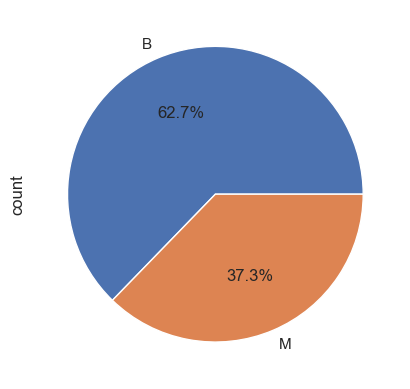

In [65]:
df['diagnosis'].value_counts().plot(kind='pie', autopct="%0.1f%%")

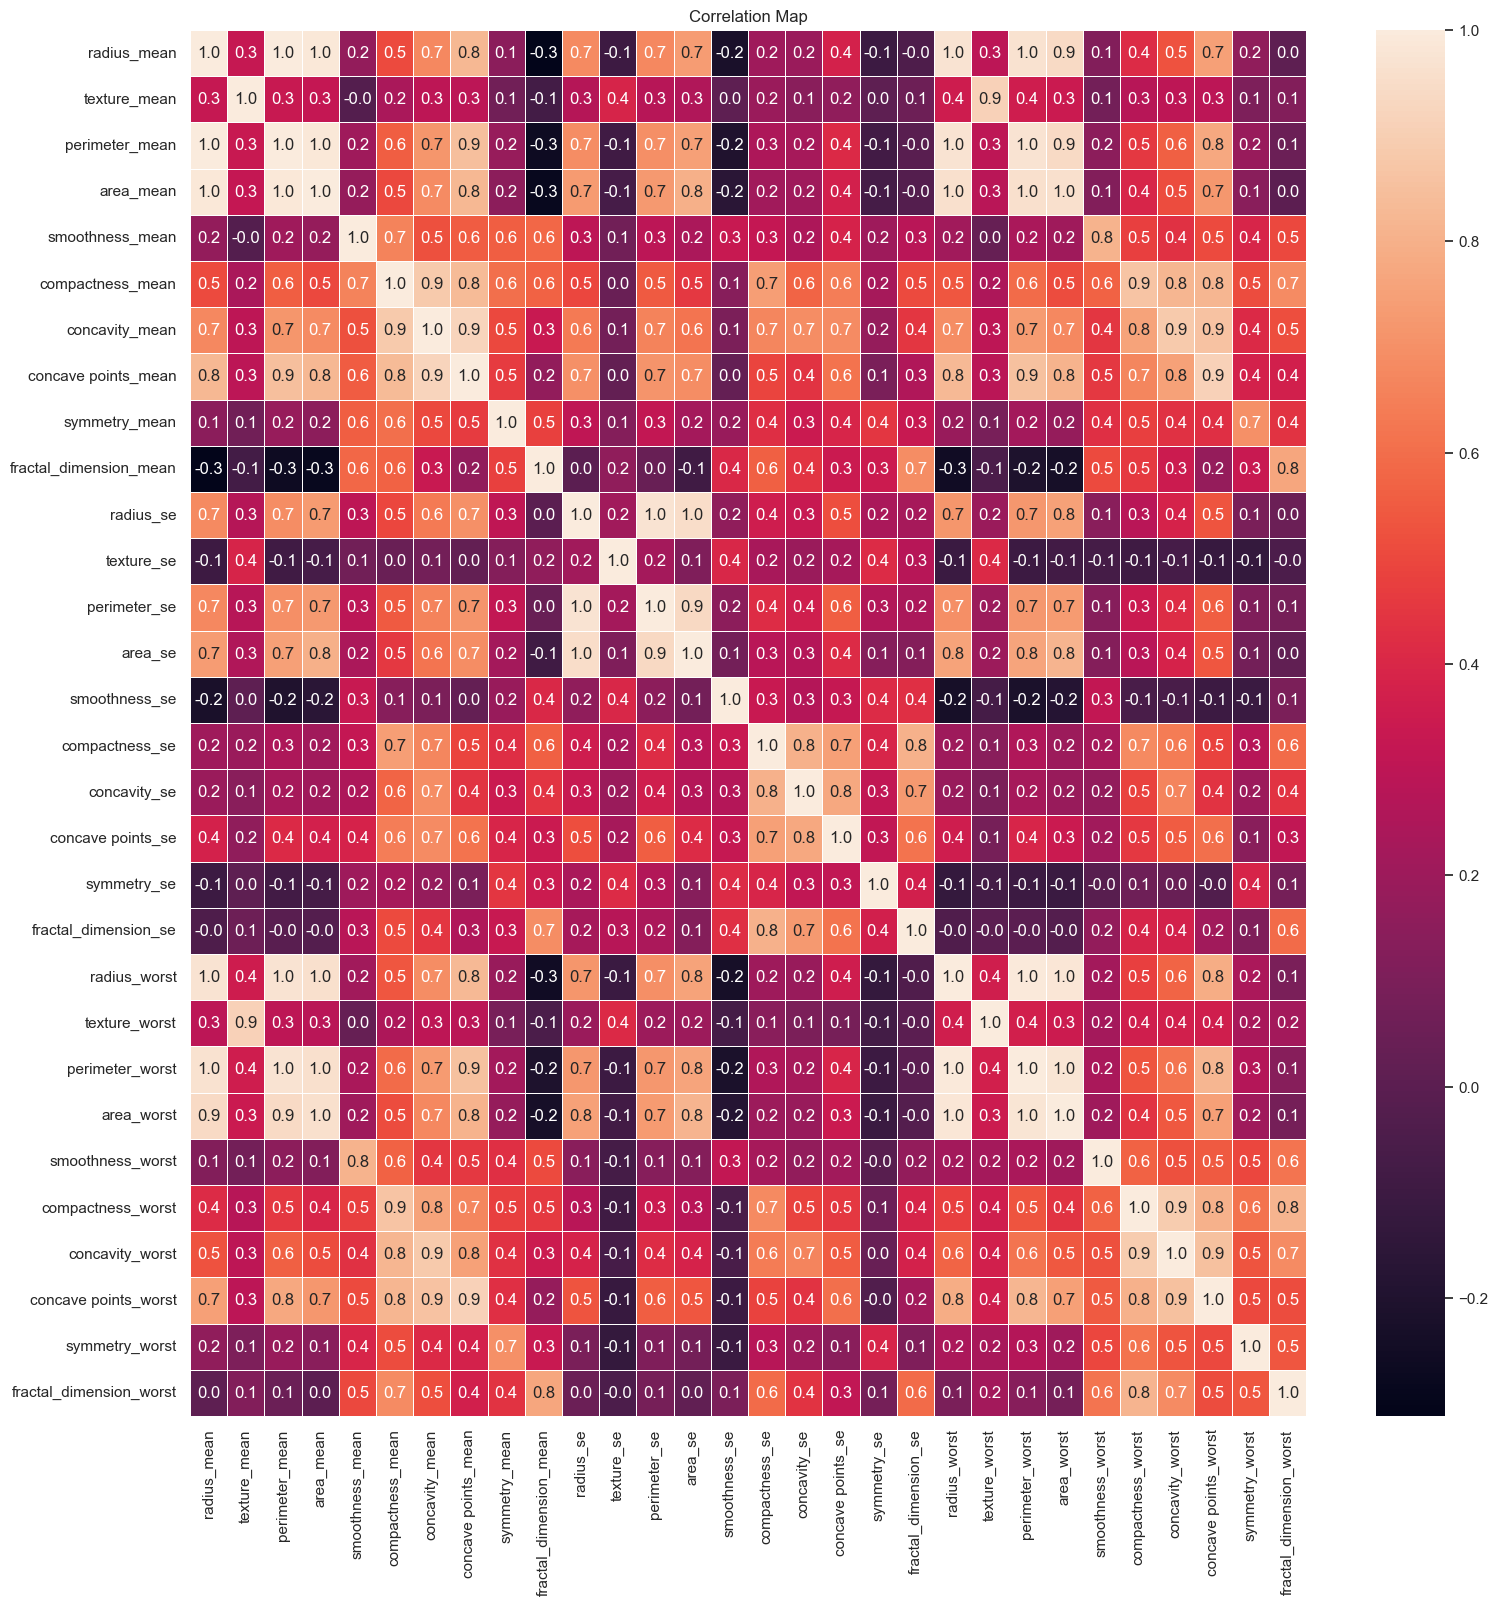

In [66]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

### There is a strong correlation between certain columns

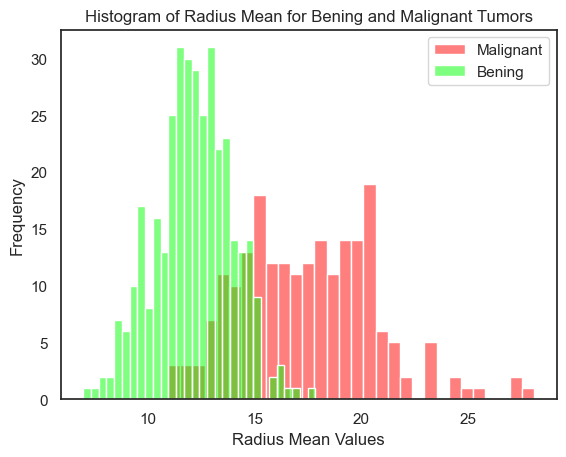

Most frequent malignant radius mean is:  20.101999999999997


In [67]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

In [68]:
m
index_frequent_malignant_radius_mean = m[0].argmax()
index_frequent_malignant_radius_mean
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

Most frequent malignant radius mean is:  20.101999999999997


### Another method

In [69]:
rmm = df[df["diagnosis"] == "M"].radius_mean
rmm.value_counts().sort_values(ascending=False)

radius_mean
15.46    3
19.40    2
17.99    2
19.53    2
15.75    2
        ..
21.56    1
20.13    1
16.60    1
27.42    1
20.60    1
Name: count, Length: 196, dtype: int64

In [70]:
col_list=df.columns.tolist()

In [71]:
melted_df = pd.melt(df, id_vars='diagnosis', value_vars=col_list[2:])

In [72]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean   
count   569.000000    569.000000      569.000000   569.000000  \
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
count       569.000000        569.000000      569.000000           569.000000  \
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst   
count     569.000000              569.000000  ...    569.000000  \
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst   
count     569.000000       569.000000   569.000000        569.000000  \
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst   
count         569.000000       569.000000            569.000000  \
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [73]:
df_s = df.drop(columns='diagnosis')

In [74]:
df_s

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean   
0          17.99         10.38          122.80     1001.0          0.11840  \
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean   
0             0.27760         0.30010              0.14710         0.2419  \
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst   
0                   0.07871  ...        25.380          17.33  \
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst   
0             184.60      2019.0           0.16220            0.66560  \
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst   
0             0.7119                0.2654          0.4601  \
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs=scaler.fit_transform(df_s).round(2)
dfs = pd.DataFrame(dfs, columns=df_s.columns)

In [76]:
dfs.describe()

radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean   
count   569.000000    569.000000      569.000000  569.000000       569.000000  \
mean     -0.000053      0.000141       -0.000018   -0.000176        -0.000105   
std       1.000906      1.000835        1.000974    1.000852         1.000758   
min      -2.030000     -2.230000       -1.980000   -1.450000        -3.110000   
25%      -0.690000     -0.730000       -0.690000   -0.670000        -0.710000   
50%      -0.220000     -0.100000       -0.240000   -0.300000        -0.030000   
75%       0.470000      0.580000        0.500000    0.360000         0.640000   
max       3.970000      4.650000        3.980000    5.250000         4.770000   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean   
count        569.000000      569.000000           569.000000     569.000000  \
mean           0.000035        0.000158            -0.000018      -0.000123   
std            1.000784        1.000797             1.000959       1.001169   
min           -1.610000       -1.110000            -1.260000      -2.740000   
25%           -0.750000       -0.740000            -0.740000      -0.700000   
50%           -0.220000       -0.340000            -0.400000      -0.070000   
75%            0.490000        0.530000             0.650000       0.530000   
max            4.570000        4.240000             3.930000       4.480000   

       fractal_dimension_mean  ...  radius_worst  texture_worst   
count              569.000000  ...    569.000000     569.000000  \
mean                 0.000193  ...      0.000070      -0.000123   
std                  1.001022  ...      1.000729       1.000913   
min                 -1.820000  ...     -1.730000      -2.220000   
25%                 -0.720000  ...     -0.670000      -0.750000   
50%                 -0.180000  ...     -0.270000      -0.040000   
75%                  0.470000  ...      0.520000       0.660000   
max                  4.910000  ...      4.090000       3.890000   

       perimeter_worst  area_worst  smoothness_worst  compactness_worst   
count       569.000000  569.000000        569.000000         569.000000  \
mean         -0.000105   -0.000088         -0.000176           0.000088   
std           1.000673    1.001119          1.000987           1.001047   
min          -1.690000   -1.220000         -2.680000          -1.440000   
25%          -0.690000   -0.640000         -0.690000          -0.680000   
50%          -0.290000   -0.340000         -0.050000          -0.270000   
75%           0.540000    0.360000          0.600000           0.540000   
max           4.290000    5.930000          3.960000           5.110000   

       concavity_worst  concave points_worst  symmetry_worst   
count       569.000000            569.000000      569.000000  \
mean         -0.000176             -0.000070        0.000053   
std           1.001249              1.001186        1.001065   
min          -1.310000             -1.750000       -2.160000   
25%          -0.760000             -0.760000       -0.640000   
50%          -0.220000             -0.220000       -0.130000   
75%           0.530000              0.710000        0.450000   
max           4.700000              2.690000        6.050000   

       fractal_dimension_worst  
count               569.000000  
mean                  0.000053  
std                   1.001107  
min                  -1.600000  
25%                  -0.690000  
50%                  -0.220000  
75%                   0.450000  
max                   6.850000  

[8 rows x 30 columns]

<Axes: xlabel='radius_mean', ylabel='Density'>

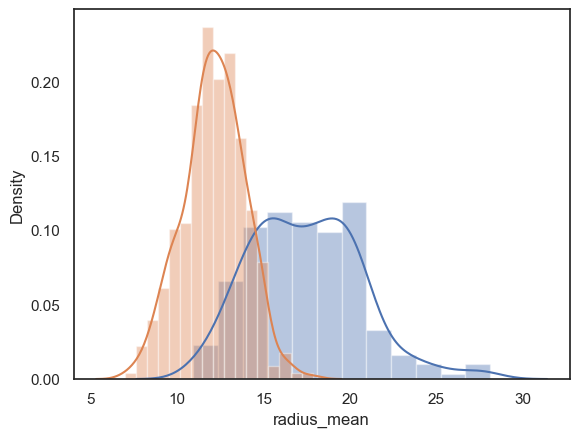

In [77]:
sns.distplot(df[df["diagnosis"] == "M"].radius_mean)
sns.distplot(df[df["diagnosis"] == "B"].radius_mean)

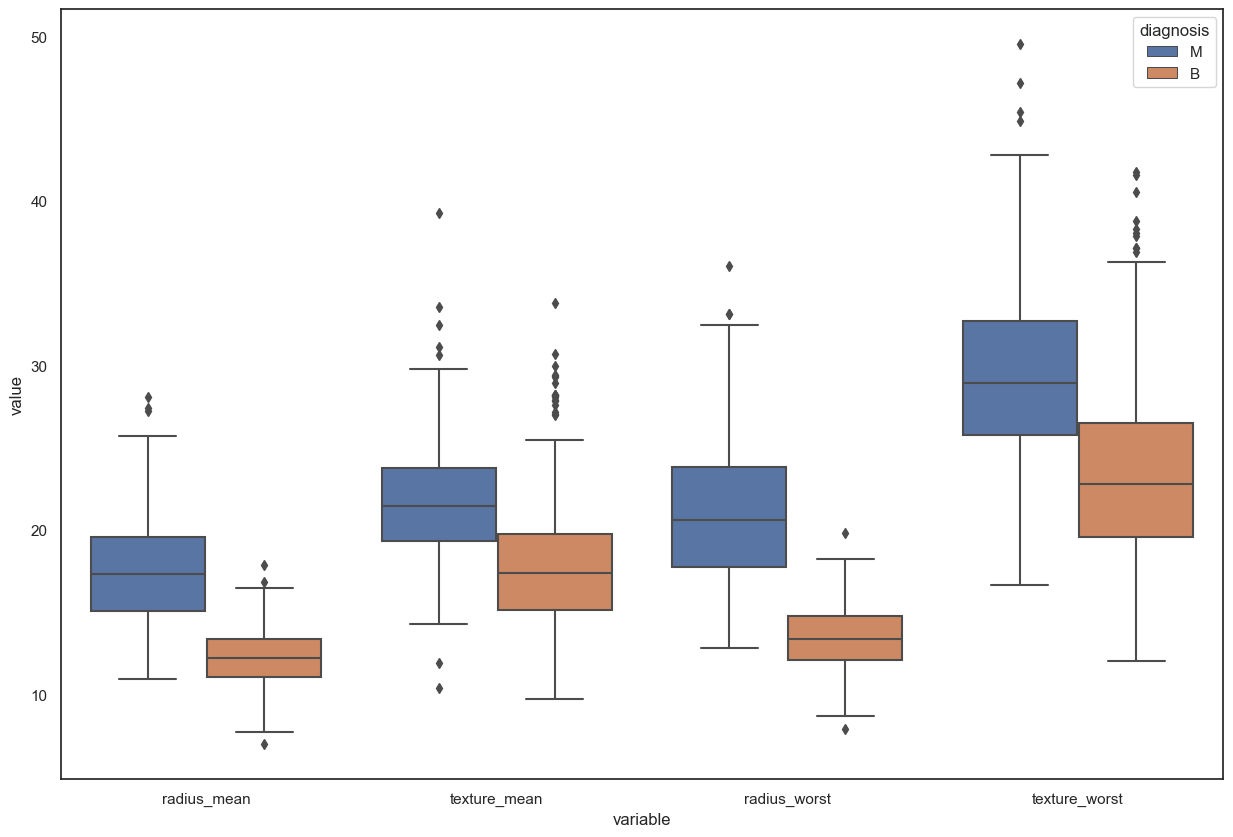

In [78]:
melted_data = pd.melt(df,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean','radius_worst','texture_worst'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

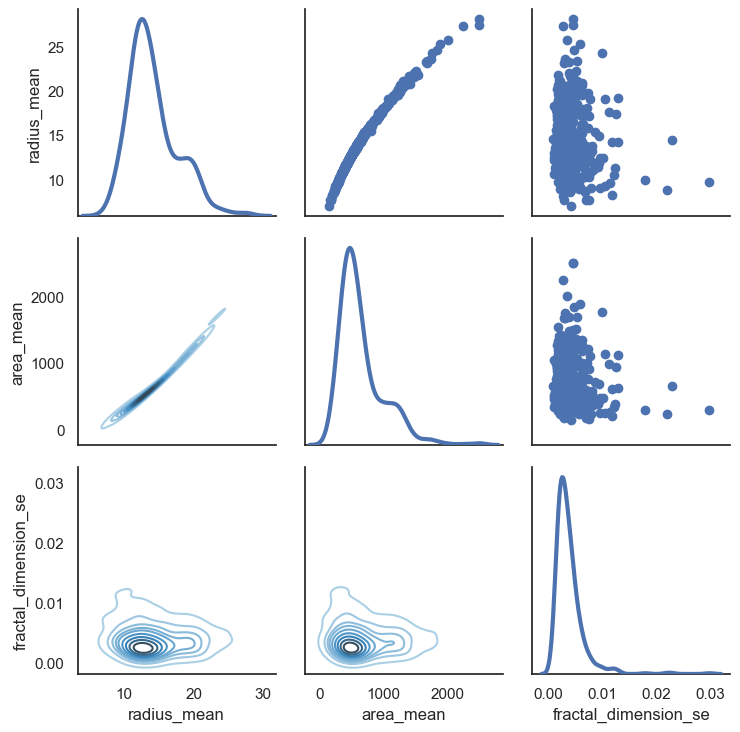

In [79]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
data = df.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(data,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [81]:
le = LabelEncoder()

In [82]:
df['diagnosis'].isnull().sum()

0

In [83]:
dfs['diagnosis']=le.fit_transform(df['diagnosis']).tolist()

In [84]:
dfs.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean   
0         1.10         -2.07            1.27       0.98             1.57  \
1         1.83         -0.35            1.69       1.91            -0.83   
2         1.58          0.46            1.57       1.56             0.94   
3        -0.77          0.25           -0.59      -0.76             3.28   
4         1.75         -1.15            1.78       1.83             0.28   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean   
0              3.28            2.65                 2.53           2.22  \
1             -0.49           -0.02                 0.55           0.00   
2              1.05            1.36                 2.04           0.94   
3              3.40            1.92                 1.45           2.87   
4              0.54            1.37                 1.43          -0.01   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst   
0                    2.26  ...          -1.36             2.30        2.00  \
1                   -0.87  ...          -0.37             1.54        1.89   
2                   -0.40  ...          -0.02             1.35        1.46   
3                    4.91  ...           0.13            -0.25       -0.55   
4                   -0.56  ...          -1.47             1.34        1.22   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst   
0              1.31               2.62             2.11                  2.30  \
1             -0.38              -0.43            -0.15                  1.09   
2              0.53               1.08             0.85                  1.96   
3              3.39               3.89             1.99                  2.18   
4              0.22              -0.31             0.61                  0.73   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0            2.75                     1.94          1  
1           -0.24                     0.28          1  
2            1.15                     0.20          1  
3            6.05                     4.94          1  
4           -0.87                    -0.40          1  

[5 rows x 31 columns]

In [85]:
import warnings
warnings.filterwarnings("ignore")

In [86]:
c =dfs.corr()['diagnosis'].sort_values(ascending=False)
c

diagnosis                  1.000000
concave points_worst       0.793429
perimeter_worst            0.782883
concave points_mean        0.776522
radius_worst               0.776342
perimeter_mean             0.742490
area_worst                 0.733679
radius_mean                0.729919
area_mean                  0.709151
concavity_mean             0.696318
concavity_worst            0.659562
compactness_mean           0.596597
compactness_worst          0.591203
radius_se                  0.567042
perimeter_se               0.556259
area_se                    0.548113
texture_worst              0.456883
smoothness_worst           0.421562
symmetry_worst             0.416302
texture_mean               0.415275
concave points_se          0.408196
smoothness_mean            0.358421
symmetry_mean              0.330634
fractal_dimension_worst    0.324014
compactness_se             0.293038
concavity_se               0.253798
fractal_dimension_se       0.078177
symmetry_se               -0

In [87]:
# c=c[c>0.4]
# c.index

In [88]:
dv=dfs[c.index.tolist()]

In [89]:
dv

diagnosis  concave points_worst  perimeter_worst  concave points_mean   
0            1                  2.30             2.30                 2.53  \
1            1                  1.09             1.54                 0.55   
2            1                  1.96             1.35                 2.04   
3            1                  2.18            -0.25                 1.45   
4            1                  0.73             1.34                 1.43   
..         ...                   ...              ...                  ...   
564          1                  1.63             1.75                 2.32   
565          1                  0.73             1.42                 1.26   
566          1                  0.41             0.58                 0.11   
567          1                  2.29             2.30                 2.66   
568          0                 -1.75            -1.43                -1.26   

     radius_worst  perimeter_mean  area_worst  radius_mean  area_mean   
0            1.89            1.27        2.00         1.10       0.98  \
1            1.81            1.69        1.89         1.83       1.91   
2            1.51            1.57        1.46         1.58       1.56   
3           -0.28           -0.59       -0.55        -0.77      -0.76   
4            1.30            1.78        1.22         1.75       1.83   
..            ...             ...         ...          ...        ...   
564          1.90            2.06        2.02         2.11       2.34   
565          1.54            1.62        1.49         1.70       1.72   
566          0.56            0.67        0.43         0.70       0.58   
567          1.96            1.98        1.65         1.84       1.74   
568         -1.41           -1.81       -1.08        -1.81      -1.35   

     concavity_mean  ...  smoothness_mean  symmetry_mean   
0              2.65  ...             1.57           2.22  \
1             -0.02  ...            -0.83           0.00   
2              1.36  ...             0.94           0.94   
3              1.92  ...             3.28           2.87   
4              1.37  ...             0.28          -0.01   
..              ...  ...              ...            ...   
564            1.95  ...             1.04          -0.31   
565            0.69  ...             0.10          -0.22   
566            0.05  ...            -0.84          -0.81   
567            3.30  ...             1.53           2.14   
568           -1.11  ...            -3.11          -0.82   

     fractal_dimension_worst  compactness_se  concavity_se   
0                       1.94            1.32          0.72  \
1                       0.28           -0.69         -0.44   
2                       0.20            0.81          0.21   
3                       4.94            2.74          0.82   
4                      -0.40           -0.05          0.83   
..                       ...             ...           ...   
564                    -0.71            0.19          0.67   
565                    -0.97           -0.07          0.25   
566                    -0.32            0.66          0.51   
567                     2.22            2.02          1.30   
568                    -0.75           -1.16         -1.06   

     fractal_dimension_se  symmetry_se  texture_se  fractal_dimension_mean   
0                    0.91         1.15       -0.57                    2.26  \
1                   -0.10        -0.81       -0.88                   -0.87   
2                    0.29         0.24       -0.78                   -0.40   
3                    2.05         4.73       -0.11                    4.91   
4                    0.50        -0.36       -0.79                   -0.56   
..                    ...          ...         ...                     ...   
564                  0.17        -1.14        0.07                   -0.93   
565                 -0.49        -0.19        2.26                   -1.06   
566                  0.

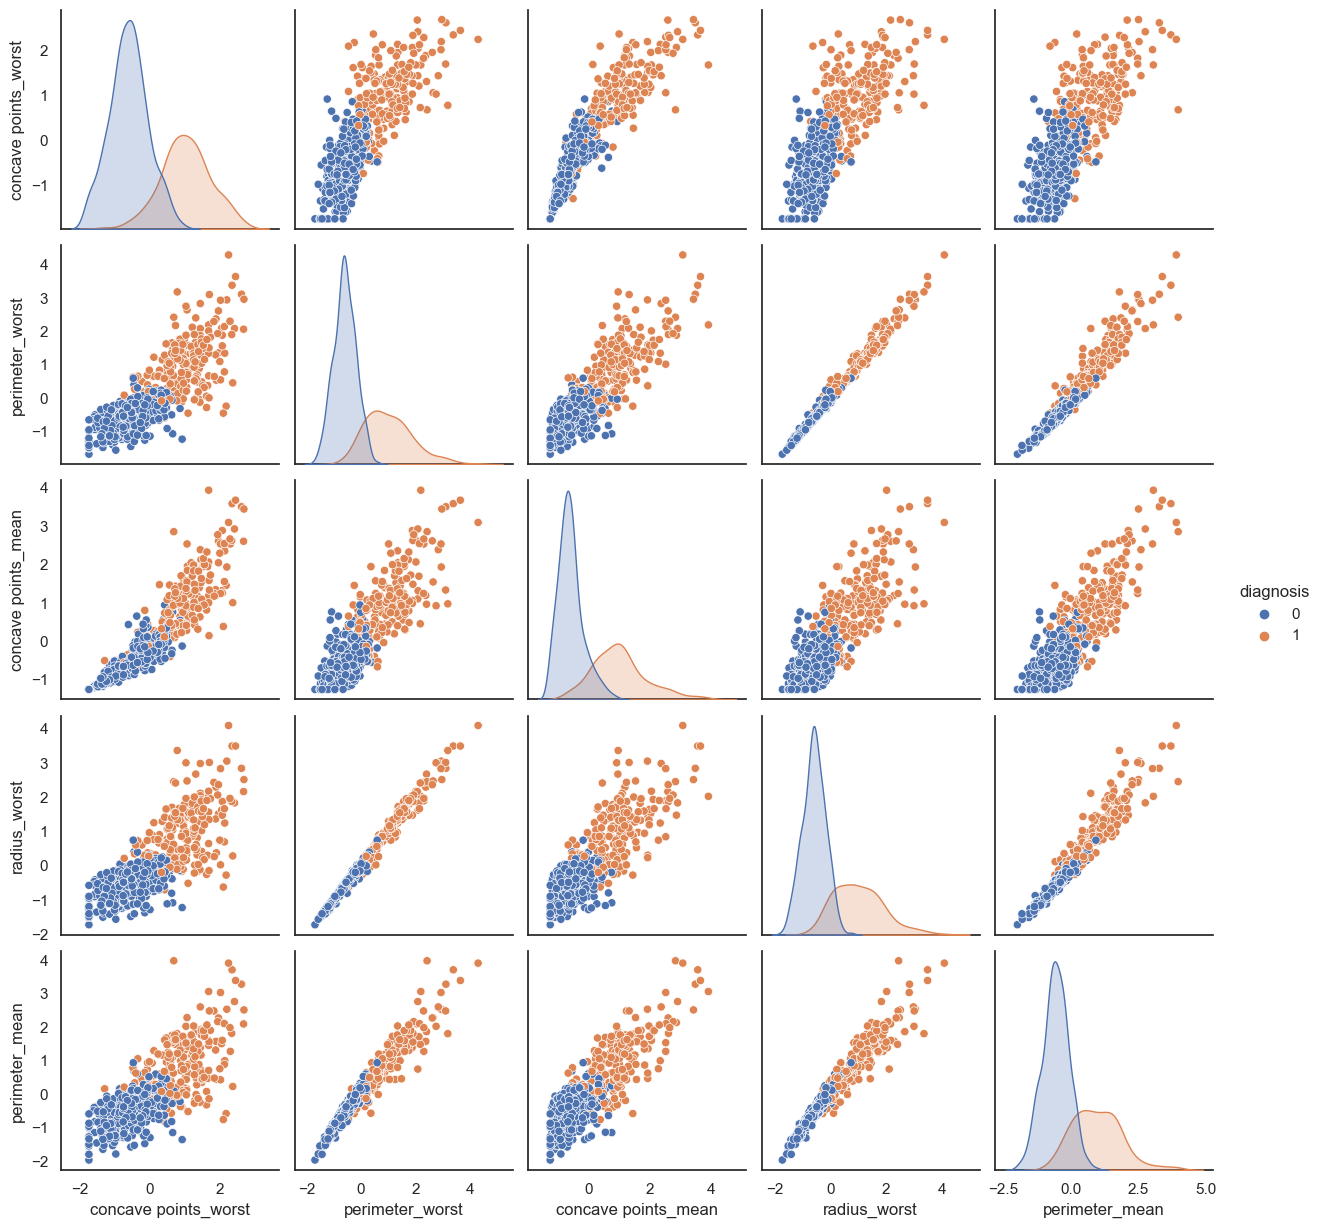

In [90]:
sns.pairplot(dv.iloc[:,:6], hue='diagnosis')

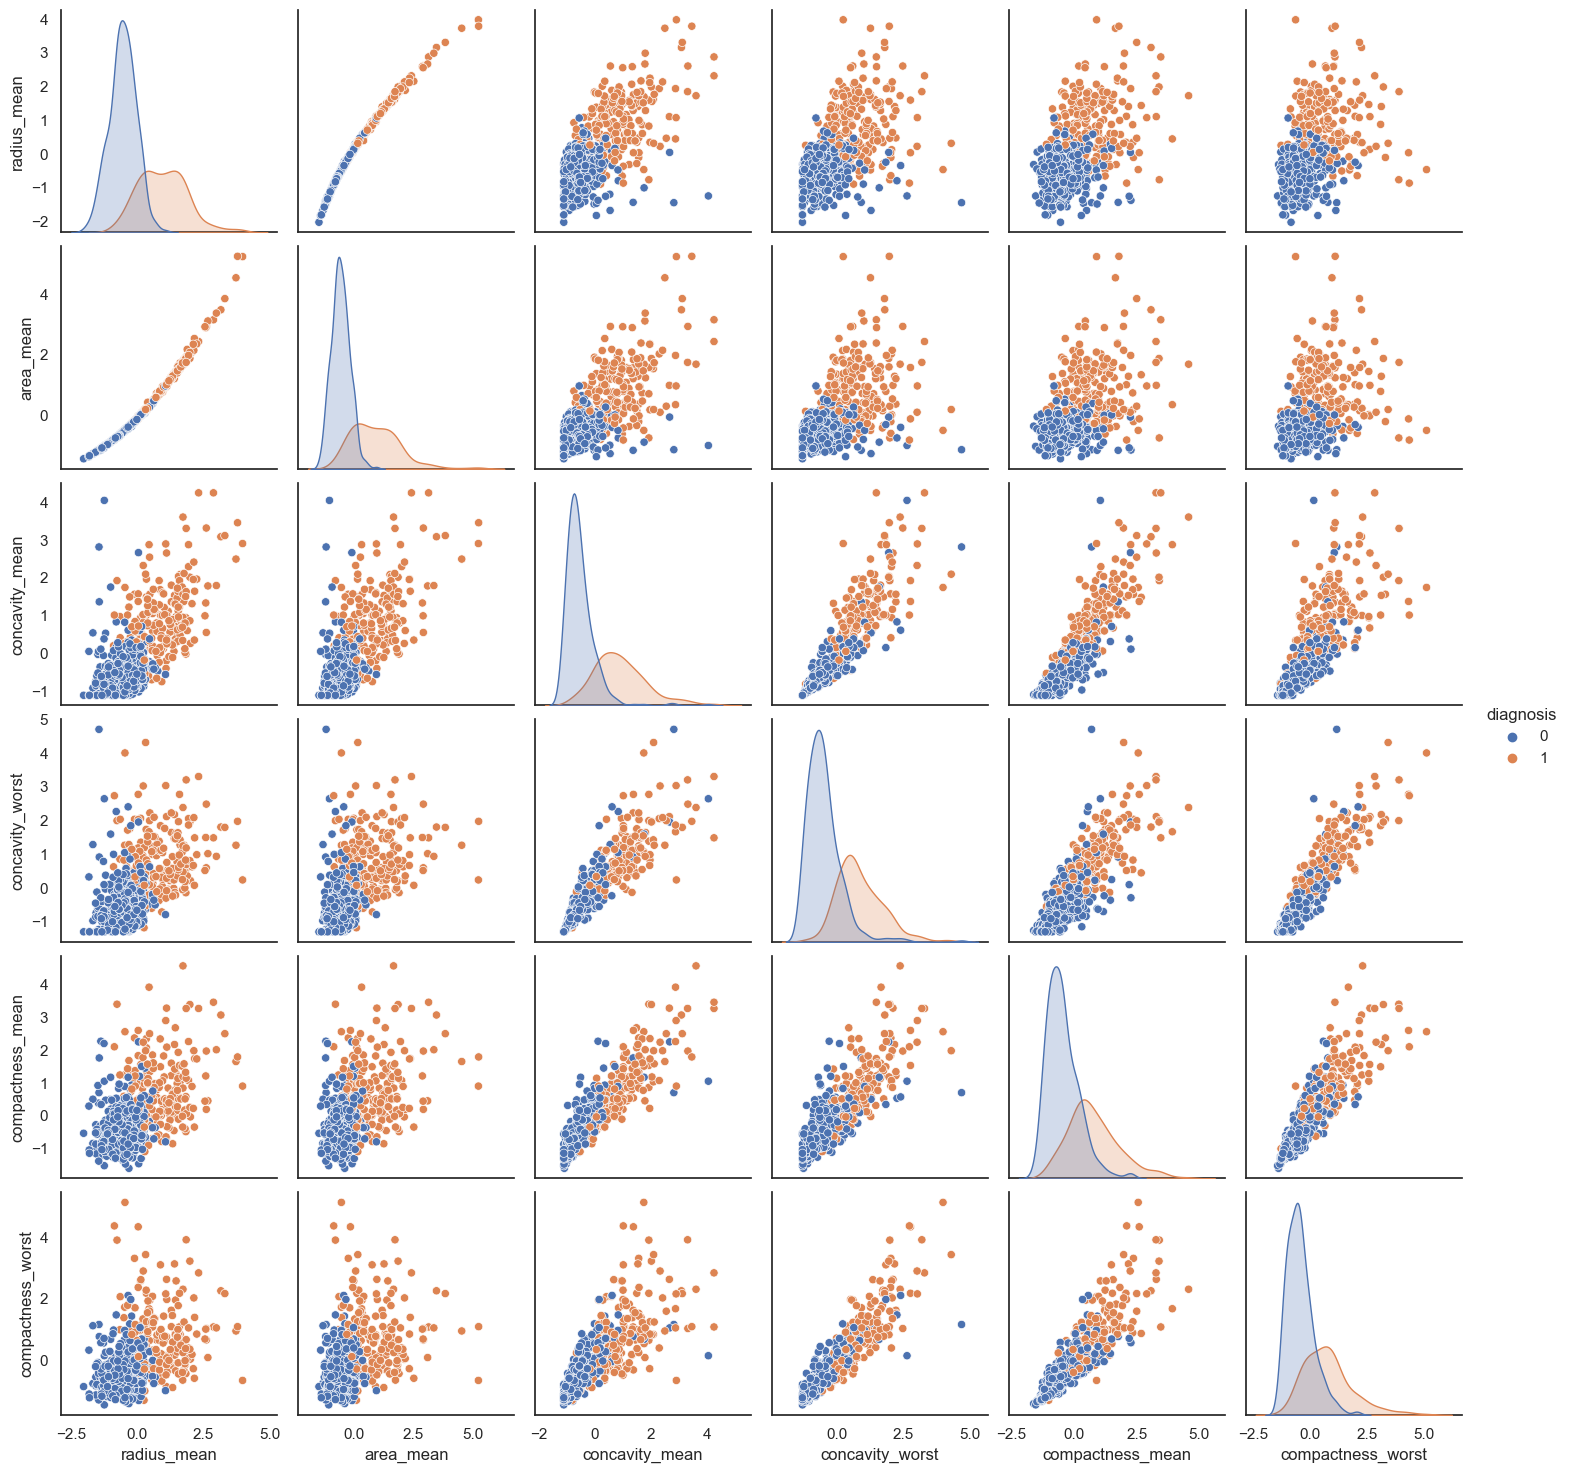

In [91]:
sns.pairplot(dv.iloc[:,[0,7,8,9,10,11,12]], hue='diagnosis')

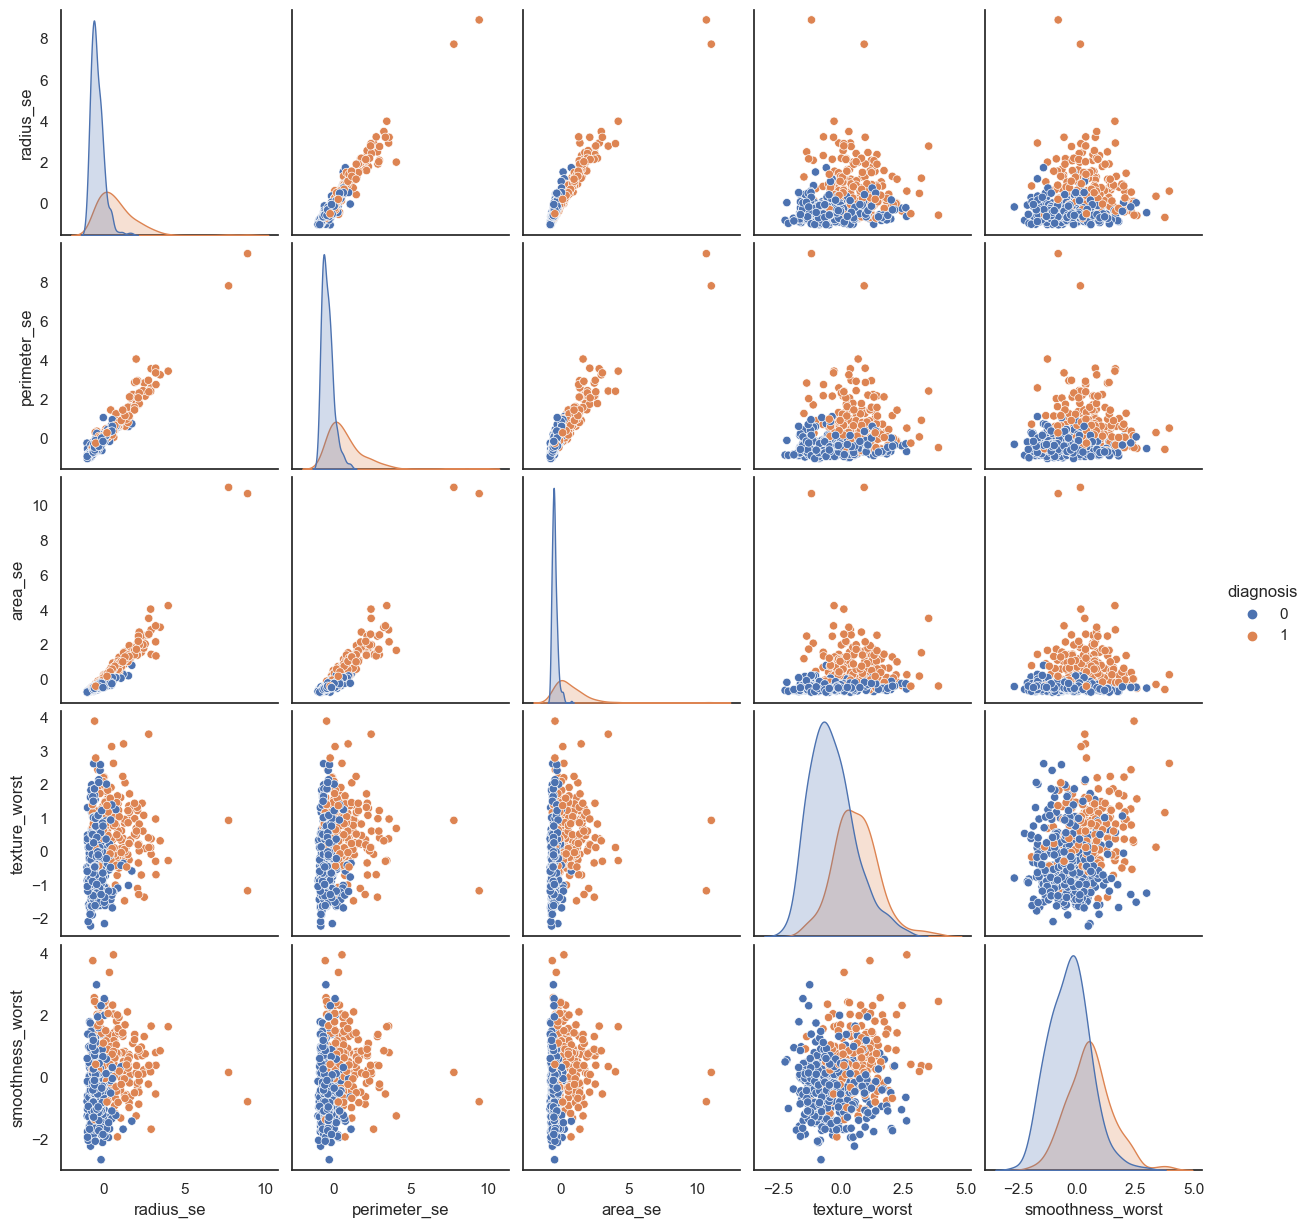

In [92]:
sns.pairplot(dv.iloc[:,[0,13,14,15,16,17]], hue='diagnosis')

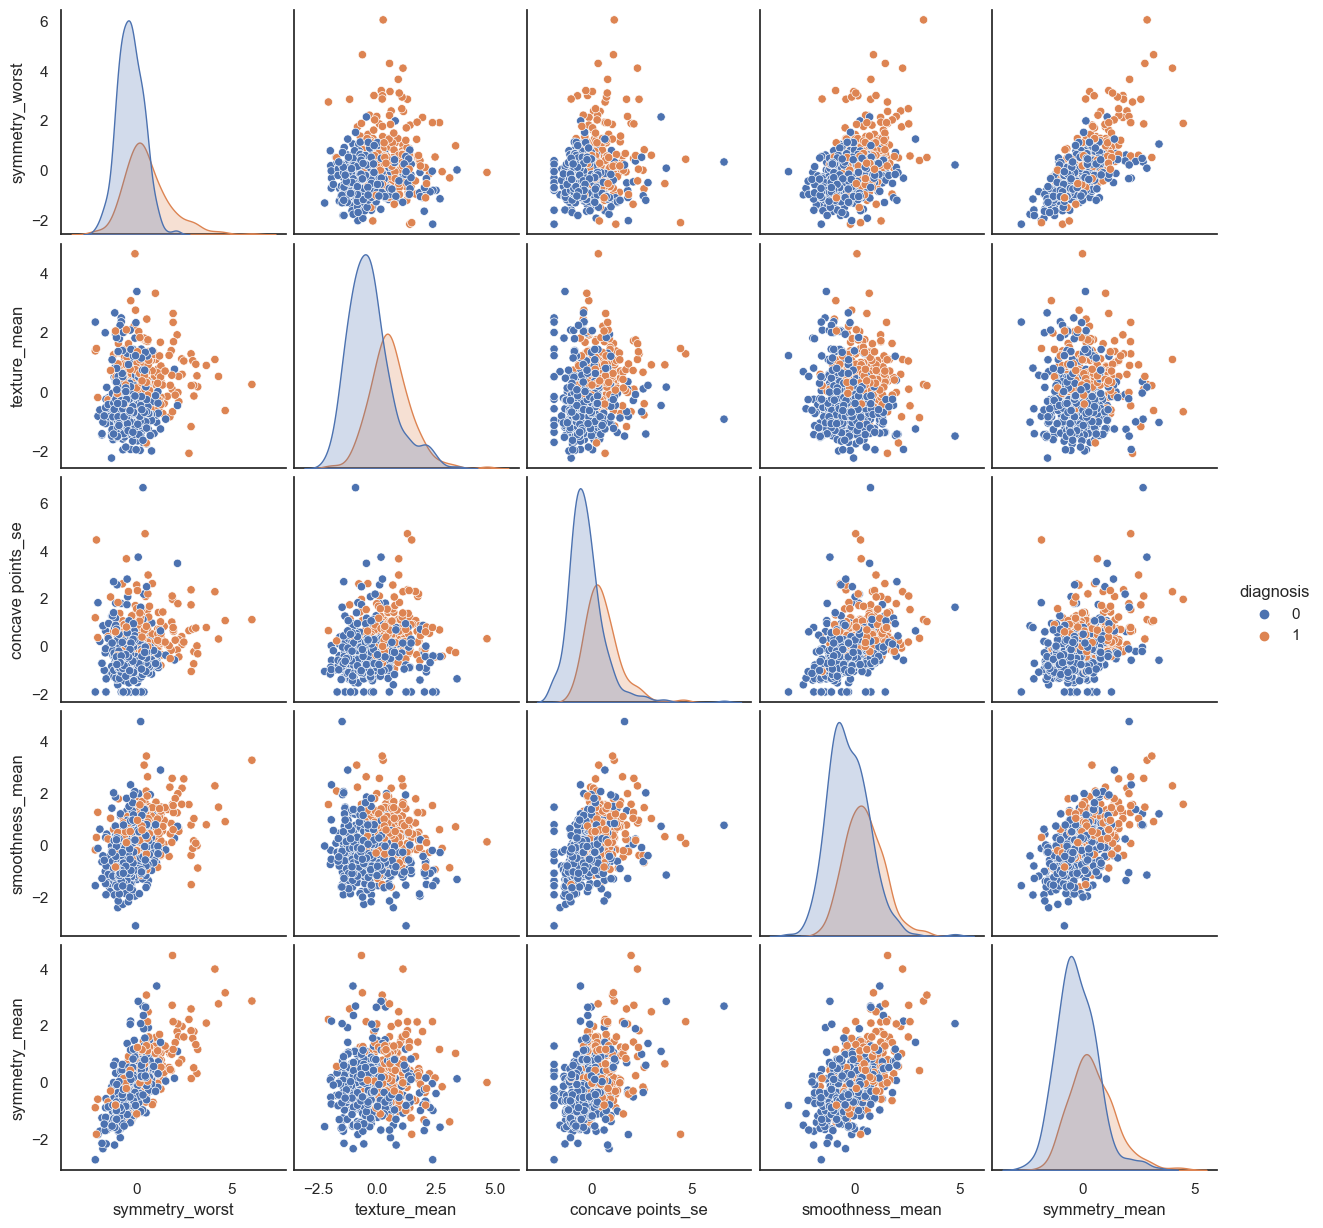

In [93]:
sns.pairplot(dv.iloc[:,[0,18,19,20,21,22]], hue='diagnosis')

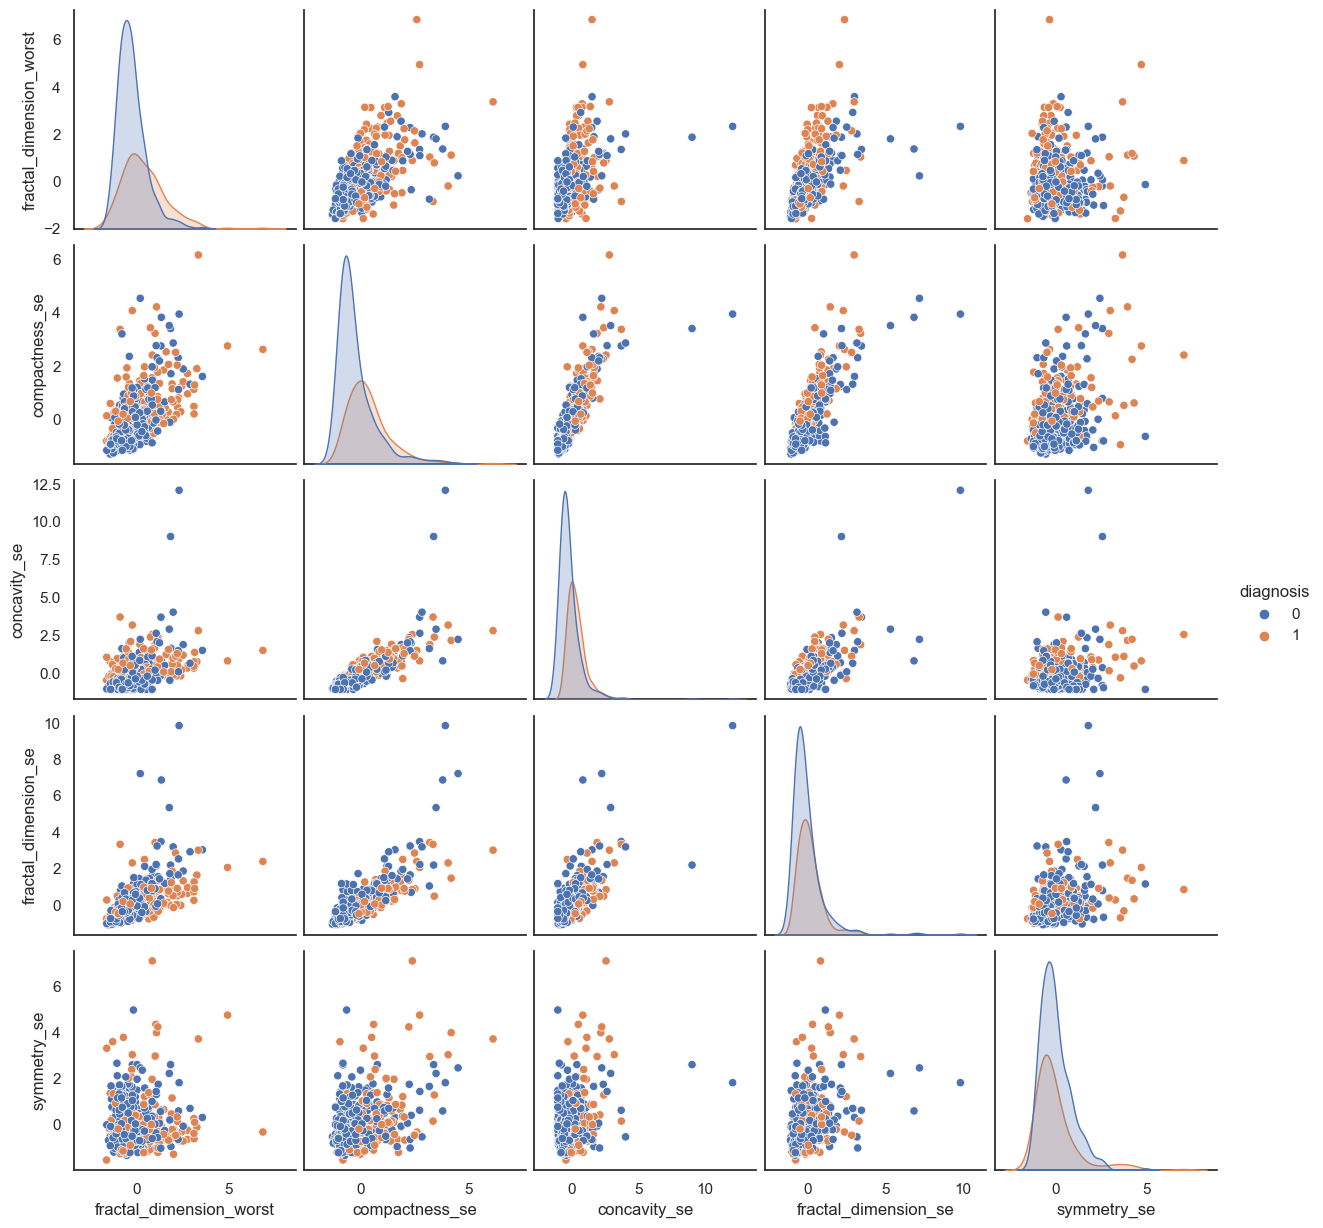

In [94]:
sns.pairplot(dv.iloc[:,[0,23,24,25,26,27]], hue='diagnosis')

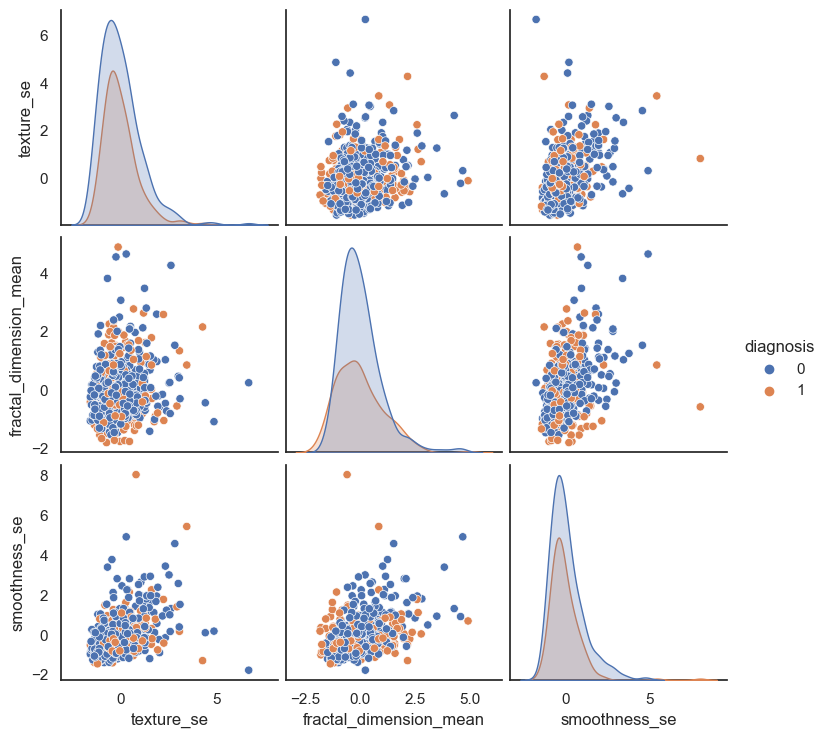

In [95]:
sns.pairplot(dv.iloc[:,[0,28,29,30]], hue='diagnosis')

### Till 10th(concavity mean) column in the dataframe, we can easily calssify the type of cancer

In [96]:
dft = dv.iloc[:,1:10]
dft.shape
# from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
# pca.fit(dft)
# dpca = pca.transform(dft)
# dpca.shape

(569, 9)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(dft,dfs['diagnosis'],test_size=0.33,random_state=42)
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr.score(x_test,y_test)

0.9680851063829787

# Using PCA

In [98]:
dft = dfs.drop(columns='diagnosis')

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(dft)
dpca = pca.set_output(transform='pandas').transform(dft)
dpca.shape
dpca

pca0       pca1      pca2      pca3      pca4
0     9.193519   1.953190 -1.123785  3.636818 -1.192243
1     2.390212  -3.774566 -0.532732  1.117165  0.629648
2     5.732196  -1.084292 -0.553059  0.908880 -0.181993
3     7.127235  10.273280 -3.231514  0.161917 -2.956277
4     3.935095  -1.950490  1.390723  2.940269  0.549715
..         ...        ...       ...       ...       ...
564   6.438471  -3.572867  2.460857  1.175691 -0.074205
565   3.791112  -3.582267  2.085668 -2.512405 -0.513135
566   1.256230  -1.903831  0.561055 -2.090033  1.807319
567  10.377416   1.671038 -1.872547 -2.357004 -0.041423
568  -5.476533  -0.668376  1.489007 -2.293932 -0.184028

[569 rows x 5 columns]

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(dpca,dfs['diagnosis'],test_size=0.33,random_state=42)


In [101]:
pt = PowerTransformer()
x_traintr = pt.fit_transform(x_train)

NameError: name 'PowerTransformer' is not defined

In [ ]:
x_testtr=pt.transform(x_test)

In [ ]:
lr = LogisticRegression()
lr.fit(x_traintr,y_train)
y_pred=lr.predict(x_testtr)
lr.score(x_testtr,y_test)

0.9680851063829787

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       121
           1       0.93      0.99      0.96        67

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [ ]:
from sklearn.metrics import f1_score,confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[116,   5],
       [  1,  66]], dtype=int64)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
np.mean(cross_val_score(lr,x_traintr,y_train, scoring='accuracy',cv=10))

0.9631578947368421

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_testtr)
lr.score(x_test,y_test)

0.9840425531914894

In [ ]:
np.mean(cross_val_score(lr,dpca, dfs['diagnosis'], scoring='accuracy',cv=10))

0.9718671679197994

In [ ]:
from sklearn.ensemble import RandomForestClassifier
     

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
rf.score(x_test,y_test)

0.9574468085106383

In [ ]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(lr, x_train, y_train, cv=5, scoring='accuracy').mean()

0.9658236500341764

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adb = AdaBoostClassifier(estimator=lr, n_estimators=85,learning_rate=0.1)

In [ ]:
adb.fit(x_train,y_train)

AdaBoostClassifier(estimator=LogisticRegression(), learning_rate=0.1,
                   n_estimators=85)

In [ ]:
adb.score(x_test,y_test)

0.9840425531914894

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(estimator=lr), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(x_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.968421 using {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}


In [ ]:
from dtreeviz.trees import *
from IPython.display import Image,display_svg,SVG

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=6)

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
clf.score(x_test,y_test)

0.9414893617021277

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag = BaggingClassifier(
    base_estimator=lr,
    n_estimators=40,
    bootstrap=True,
    random_state=42
)
     

bag.fit(x_traintr,y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=40,
                  random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = bag.predict(x_testtr)
     

accuracy_score(y_test,y_pred)

0.9840425531914894

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       121
           1       0.97      0.99      0.98        67

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [ ]:
np.mean(cross_val_score(bag,dpca, dfs['diagnosis'], scoring='accuracy',cv=10))

NameError: name 'cross_val_score' is not defined

# Result

The best accuracy is achieved by Logistic Regression and Bagging Classifier using Logistic Regression as its base models. 

### The best accuracy is 0.98